In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import reuters
import seaborn as sns
from tensorflow.keras.datasets import cifar10

In [3]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=200)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

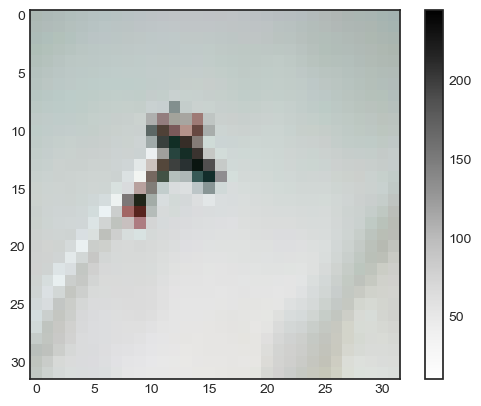

In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [6]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [8]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [9]:
x_train.shape

(40000, 3072)

In [10]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                196672    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                6

In [12]:
utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

from keras.callbacks import EarlyStopping
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.3)

Epoch 1/10
1250/1250 [==============================] - 11s 8ms/step - loss: 2.0272 - accuracy: 0.2699
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9503 - accuracy: 0.2923
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9447 - accuracy: 0.2936
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9489 - accuracy: 0.2900
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9303 - accuracy: 0.2966
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9277 - accuracy: 0.3001
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9234 - accuracy: 0.3043
Epoch 8/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9264 - accuracy: 0.3022
Epoch 9/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9115 - accuracy: 0.3109
Epoch 10/10
1250/1250 [==============================] - 11s 8ms/step - loss:

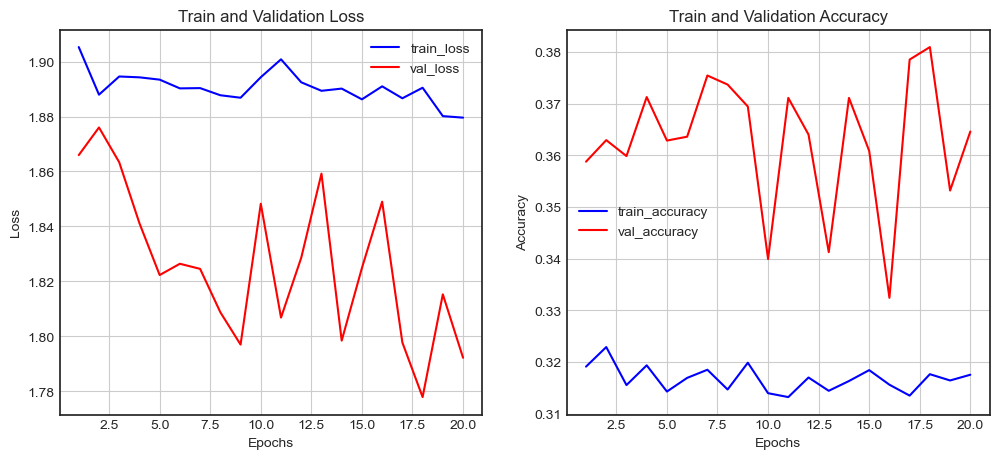

In [14]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.7799 - accuracy: 0.3629


[1.7799021005630493, 0.3628999888896942]

# 회고

### 모델 학습을 통해 실제값과 거의 비슷한 값을 얻어낼 수 있었다.
### 우선 노드에 나온 순서대로 코드를 작성하여 값을 얻어 내었다.
### 노드에 나온 순서대로 하다보니 수치를 수십번 조정하여 원하던 그래프를 얻어 낼수 있었다.(batch_size가 제일 영향이 높음)
### 추가로 실제값과 예측값을 비교하여 모델을 제대로 학습 시킬수 있었다.
### 다량의 데이터들을 모델학습하여 나온 결과값들을 쉽게 예측할 수 있었던 시간이었다.
### mae값을 최대한 실제값과 근사한 값을 도출해 내었다.
### 코드 부분은 구글링을 통해서 조금씩 수정하여 파일을 완성시켰다.
### 지난번 프로젝트보다 시간적여유가 조금 더 있었던거 같아 나름 좀 더 고민하고 생각할 수 있는 시간이 되었던거 같아 의미있었다.

### 